In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm, cross_validation

In [10]:
df_train = pd.read_json('train.json')

In [11]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

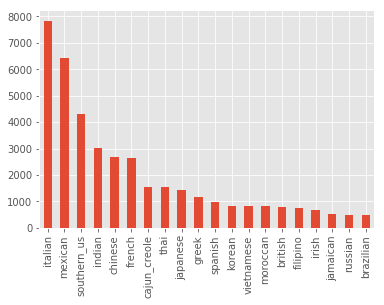

In [54]:
df_train['cuisine'].value_counts().plot(kind='bar')

In [15]:
from collections import Counter

In [16]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [17]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [18]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [19]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)

In [20]:
df_train.head()

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [21]:
df_train['all_ingredients'].str.contains('garlic cloves')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12        True
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
39744     True
39745    False
39746    False
39747    False
39748    False
39749    False
39750    False
39751    False
39752    False
39753     True
39754     True
39755    False
39756    False
39757     True
39758    False
39759    False
39760    False
39761     True
39762    False
39763    False
39764    False
39765    False
39766    False
39767    False
39768    False
39769    False
39770    False
39771    False
39772    False
39773    False
Name: all_ingredients, Length: 39774, dtype: bool

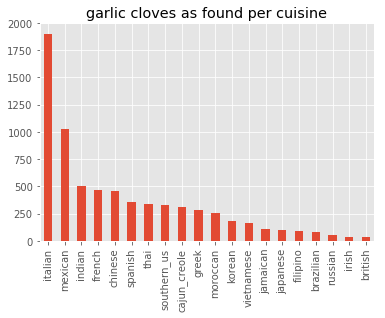

In [22]:
indices = df_train['all_ingredients'].str.contains('garlic cloves')
df_train[indices]['cuisine'].value_counts().plot(kind='bar',
                                                 title='garlic cloves as found per cuisine')

In [23]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime', 'milk',
       'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots', 'sour cream',
       'soy sauce', 'sugar', 'tomatoes', 'un

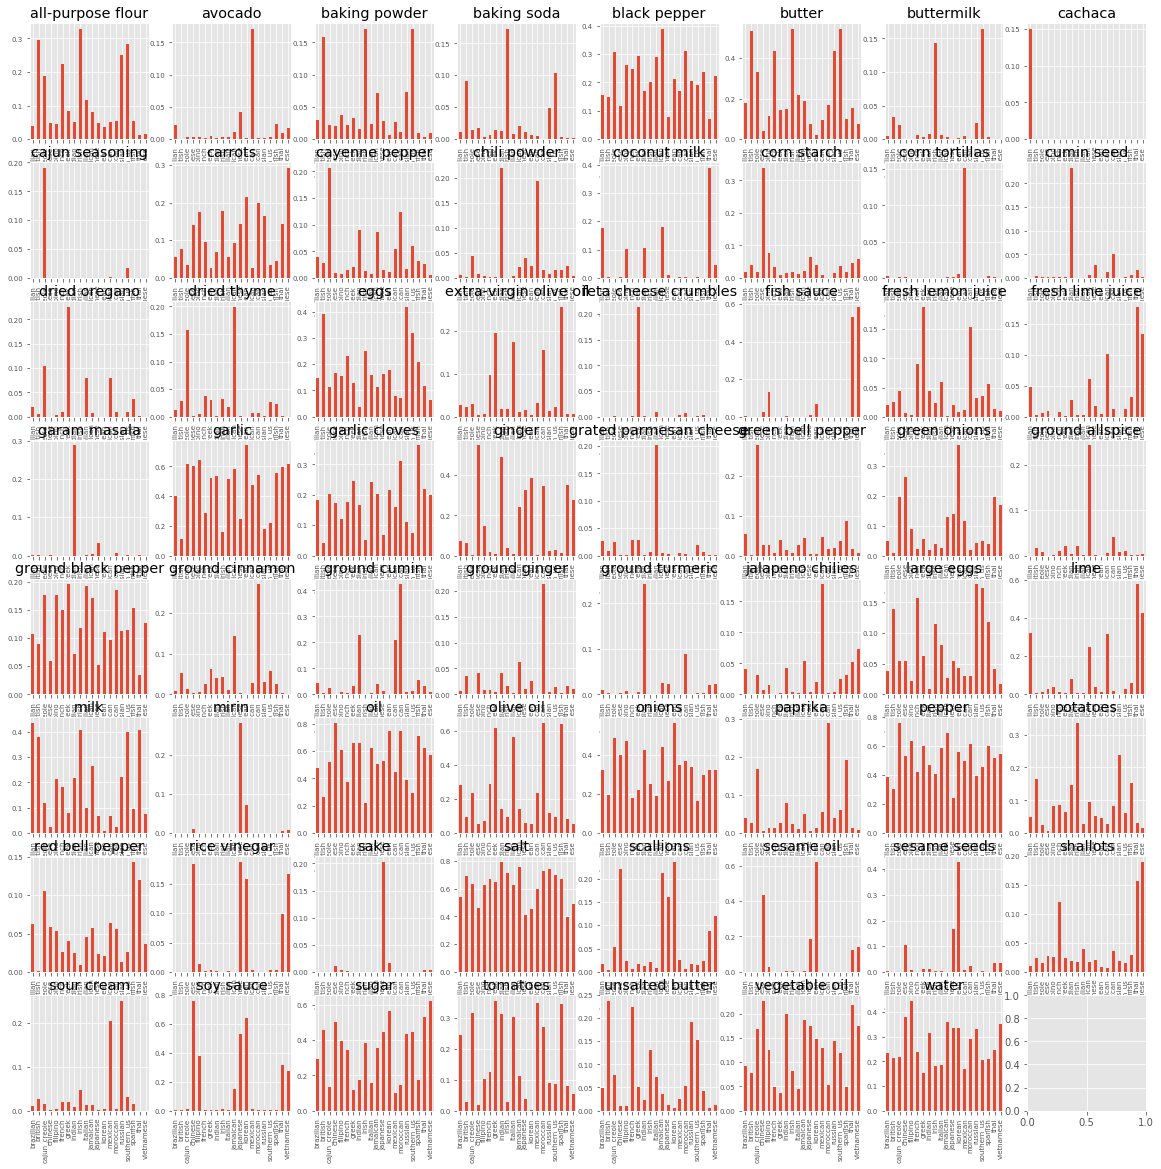

In [24]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer()

In [27]:
X = cv.fit_transform(df_train['all_ingredients'].values)

In [29]:
df_train

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour;sugar;butter;eggs;fresh ginger roo...
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil;salt;medium shrimp;pepper;garlic;cho...
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",sugar;pistachio nuts;white almond bark;flour;v...
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",olive oil;purple onion;fresh pineapple;pork;po...
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes;fresh basil;garlic;extra-virg...


In [127]:
X.shape

(39774, 3010)

In [128]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)

In [32]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [33]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [34]:
from sklearn.cross_validation import train_test_split

/Users/marinaermolova/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
from sklearn.linear_model import LogisticRegression

In [123]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([13,  2,  4, ..., 13,  7, 13])

In [56]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
logistic.score(X_test, y_test)

0.78214959145191698

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm, cross_validation
alg_frst = RandomForestClassifier(random_state=1)
scores = cross_validation.cross_val_score(alg_frst, X, y, cv=cv)
scores.mean()

0.69648525502552661

In [44]:
logistic = LogisticRegression(random_state=42)
scores = cross_validation.cross_val_score(logistic, X, y, cv=cv)
scores.mean()

0.78347651679853048

In [45]:
from sklearn.neighbors import KNeighborsClassifier
alg_ngbh = KNeighborsClassifier(n_neighbors=3)
scores = cross_validation.cross_val_score(alg_ngbh, X, y, cv=cv, n_jobs=-1)

scores.mean()

0.60398633533641966

In [49]:
from sklearn.grid_search import GridSearchCV
lr = LogisticRegression(random_state=42)
grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 2, 3, 5, 10]}
clf = GridSearchCV(lr, param_grid = grid, scoring = 'accuracy', cv = 5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'penalty': 'l2'}
0.785890280082466


Text(0.5,64.6,'Predicted label')

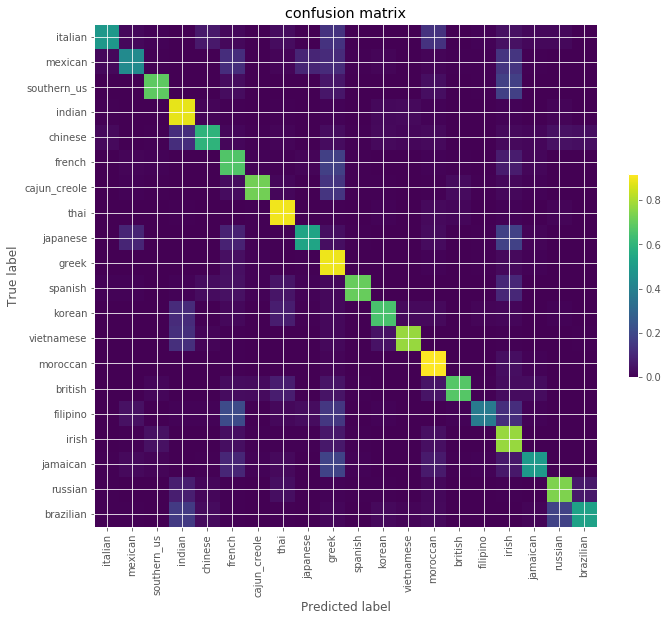

In [58]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [59]:
from sklearn.metrics import classification_report

In [60]:
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.67      0.49      0.57        96
     mexican       0.60      0.44      0.51       157
 southern_us       0.78      0.69      0.73       310
      indian       0.78      0.89      0.83       535
     chinese       0.75      0.60      0.66       172
      french       0.62      0.67      0.64       521
cajun_creole       0.82      0.73      0.77       233
        thai       0.86      0.90      0.88       584
    japanese       0.65      0.54      0.59       147
       greek       0.81      0.90      0.85      1568
     spanish       0.77      0.71      0.74        99
      korean       0.82      0.66      0.73       282
  vietnamese       0.81      0.78      0.79       152
    moroccan       0.89      0.92      0.90      1246
     british       0.82      0.68      0.74       186
    filipino       0.60      0.38      0.47       100
       irish       0.70      0.78      0.74       871
    jamaican       0.68    

In [61]:
import codecs
df_train = pd.read_json(codecs.open('train.json', 'r', 'utf-8'))

In [62]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [63]:
all_ingredients_text = []
for ingredient_list in df_train.ingredients:
    all_ingredients_text += [ing.lower() for ing in ingredient_list]

In [64]:
len(all_ingredients_text)

428275

In [65]:
len(set(all_ingredients_text))

6703

In [66]:
import re
re.split(re.compile('[,. ]+'), 'KRAFT Shredded Pepper Jack Cheese with a TOUCH OF PHILADELPHIA')


['KRAFT',
 'Shredded',
 'Pepper',
 'Jack',
 'Cheese',
 'with',
 'a',
 'TOUCH',
 'OF',
 'PHILADELPHIA']

In [67]:
splitter = re.compile('[,. ]+')
all_words = []
for ingredient in all_ingredients_text:
    all_words += re.split(splitter, ingredient)

In [68]:
len(all_words)

807802

In [69]:
len(set(all_words))

3152

In [70]:
sorted(set(all_ingredients_text), key=len, reverse=True)[:50]

['pillsbury™ crescent recipe creations® refrigerated seamless dough sheet',
 'kraft mexican style shredded four cheese with a touch of philadelphia',
 'bertolli vineyard premium collect marinara with burgundi wine sauc',
 'hidden valley® farmhouse originals italian with herbs dressing',
 'kraft shredded pepper jack cheese with a touch of philadelphia',
 'hidden valley® original ranch salad® dressing & seasoning mix',
 'condensed reduced fat reduced sodium cream of mushroom soup',
 'hellmannâ€™ or best food canola cholesterol free mayonnais',
 'condensed reduced fat reduced sodium cream of chicken soup',
 "i can't believ it' not butter! made with olive oil spread",
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 'wish-bone light asian sesame ginger vinaigrette dressing',
 'kraft shredded low-moisture part-skim mozzarella cheese',
 'kraft mexican style 2% milk finely shredded four cheese',
 'hurst family harvest chipotle lime black bean soup mix',
 'reduced fat reduced sodi

In [71]:
import re

def to_ingredient(text):
    "Transforms text into an ingredient."
    return frozenset(re.split(re.compile('[,. ]+'), text))

In [72]:
all_ingredients = [to_ingredient(text) for text in all_ingredients_text]

In [73]:
all_ingredients[:10]

[frozenset({'lettuce', 'romaine'}),
 frozenset({'black', 'olives'}),
 frozenset({'grape', 'tomatoes'}),
 frozenset({'garlic'}),
 frozenset({'pepper'}),
 frozenset({'onion', 'purple'}),
 frozenset({'seasoning'}),
 frozenset({'beans', 'garbanzo'}),
 frozenset({'cheese', 'crumbles', 'feta'}),
 frozenset({'flour', 'plain'})]

In [74]:
import itertools

def candidates(ingredient):
    "Returns a list of candidate ingredients obtained from the original ingredient by keeping at least one of them."
    n = len(ingredient)
    possible = []
    for i in range(1, n + 1):
        possible += [frozenset(combi) for combi in itertools.combinations(ingredient, i)]
    return possible

In [75]:
candidates(to_ingredient("tomato and herb pasta sauce"))

[frozenset({'herb'}),
 frozenset({'sauce'}),
 frozenset({'pasta'}),
 frozenset({'tomato'}),
 frozenset({'and'}),
 frozenset({'herb', 'sauce'}),
 frozenset({'herb', 'pasta'}),
 frozenset({'herb', 'tomato'}),
 frozenset({'and', 'herb'}),
 frozenset({'pasta', 'sauce'}),
 frozenset({'sauce', 'tomato'}),
 frozenset({'and', 'sauce'}),
 frozenset({'pasta', 'tomato'}),
 frozenset({'and', 'pasta'}),
 frozenset({'and', 'tomato'}),
 frozenset({'herb', 'pasta', 'sauce'}),
 frozenset({'herb', 'sauce', 'tomato'}),
 frozenset({'and', 'herb', 'sauce'}),
 frozenset({'herb', 'pasta', 'tomato'}),
 frozenset({'and', 'herb', 'pasta'}),
 frozenset({'and', 'herb', 'tomato'}),
 frozenset({'pasta', 'sauce', 'tomato'}),
 frozenset({'and', 'pasta', 'sauce'}),
 frozenset({'and', 'sauce', 'tomato'}),
 frozenset({'and', 'pasta', 'tomato'}),
 frozenset({'herb', 'pasta', 'sauce', 'tomato'}),
 frozenset({'and', 'herb', 'pasta', 'sauce'}),
 frozenset({'and', 'herb', 'sauce', 'tomato'}),
 frozenset({'and', 'herb', 'past

In [76]:
candidates(to_ingredient('knorr chicken flavor bouillon cube'))

[frozenset({'knorr'}),
 frozenset({'flavor'}),
 frozenset({'chicken'}),
 frozenset({'cube'}),
 frozenset({'bouillon'}),
 frozenset({'flavor', 'knorr'}),
 frozenset({'chicken', 'knorr'}),
 frozenset({'cube', 'knorr'}),
 frozenset({'bouillon', 'knorr'}),
 frozenset({'chicken', 'flavor'}),
 frozenset({'cube', 'flavor'}),
 frozenset({'bouillon', 'flavor'}),
 frozenset({'chicken', 'cube'}),
 frozenset({'bouillon', 'chicken'}),
 frozenset({'bouillon', 'cube'}),
 frozenset({'chicken', 'flavor', 'knorr'}),
 frozenset({'cube', 'flavor', 'knorr'}),
 frozenset({'bouillon', 'flavor', 'knorr'}),
 frozenset({'chicken', 'cube', 'knorr'}),
 frozenset({'bouillon', 'chicken', 'knorr'}),
 frozenset({'bouillon', 'cube', 'knorr'}),
 frozenset({'chicken', 'cube', 'flavor'}),
 frozenset({'bouillon', 'chicken', 'flavor'}),
 frozenset({'bouillon', 'cube', 'flavor'}),
 frozenset({'bouillon', 'chicken', 'cube'}),
 frozenset({'chicken', 'cube', 'flavor', 'knorr'}),
 frozenset({'bouillon', 'chicken', 'flavor', 'kn

In [77]:
from collections import Counter

c = Counter(all_ingredients)

c.most_common(20)

[(frozenset({'salt'}), 18049),
 (frozenset({'onions'}), 7972),
 (frozenset({'oil', 'olive'}), 7972),
 (frozenset({'water'}), 7457),
 (frozenset({'garlic'}), 7380),
 (frozenset({'sugar'}), 6434),
 (frozenset({'cloves', 'garlic'}), 6237),
 (frozenset({'butter'}), 4848),
 (frozenset({'black', 'ground', 'pepper'}), 4785),
 (frozenset({'all-purpose', 'flour'}), 4632),
 (frozenset({'pepper'}), 4438),
 (frozenset({'oil', 'vegetable'}), 4385),
 (frozenset({'eggs'}), 3388),
 (frozenset({'sauce', 'soy'}), 3296),
 (frozenset({'kosher', 'salt'}), 3113),
 (frozenset({'green', 'onions'}), 3078),
 (frozenset({'tomatoes'}), 3058),
 (frozenset({'eggs', 'large'}), 2948),
 (frozenset({'carrots'}), 2814),
 (frozenset({'butter', 'unsalted'}), 2782)]

In [78]:
from collections import defaultdict
probability = defaultdict(lambda: 1, c.most_common())

In [79]:
probability[to_ingredient('pasta and herb')]

1

In [80]:
probability[to_ingredient('tomato sauce')]

867

In [81]:
def best_replacement(ingredient):
    "Computes best replacement ingredient for a given input."
    return max(candidates(ingredient), key=lambda c: probability[c])

In [82]:
best_replacement(to_ingredient("tomato sauce"))

frozenset({'sauce', 'tomato'})

In [83]:
best_replacement(to_ingredient("pasta and herb"))

frozenset({'pasta'})

In [84]:
best_replacement(to_ingredient("kraft mexican style shredded four cheese with a touch of philadelphia"))


frozenset({'cheese'})

In [85]:
pd.DataFrame([(text, 
               " ".join(best_replacement(to_ingredient(text)))) 
              for text in sorted(set(all_ingredients_text), key=len, reverse=True)[:50]],
            columns=['original ingredient', 'improved ingredient'])

,original ingredient,improved ingredient
0,pillsbury™ crescent recipe creations® refriger...,dough
1,kraft mexican style shredded four cheese with ...,cheese
2,bertolli vineyard premium collect marinara wit...,wine
3,hidden valley® farmhouse originals italian wit...,herbs
4,kraft shredded pepper jack cheese with a touch...,pepper
5,hidden valley® original ranch salad® dressing ...,seasoning
6,condensed reduced fat reduced sodium cream of ...,cream
7,hellmannâ€™ or best food canola cholesterol fr...,canola
8,condensed reduced fat reduced sodium cream of ...,chicken
9,i can't believ it' not butter! made with olive...,oil olive


In [86]:
def candidates_increasing_distance(ingredient, vocabulary):
    "Returns candidate ingredients obtained from the original ingredient by substraction, largest number of ingredients first."
    n = len(ingredient)
    for i in range(n - 1, 1, -1):
        possible = [frozenset(combi) for combi in itertools.combinations(ingredient, i) 
                    if frozenset(combi) in vocabulary]
        if len(possible) > 0:
            return possible
    return [ingredient]

In [87]:
vocabulary = dict(c.most_common())

In [88]:
list(vocabulary.keys())[:10]

[frozenset({'salt'}),
 frozenset({'onions'}),
 frozenset({'oil', 'olive'}),
 frozenset({'water'}),
 frozenset({'garlic'}),
 frozenset({'sugar'}),
 frozenset({'cloves', 'garlic'}),
 frozenset({'butter'}),
 frozenset({'black', 'ground', 'pepper'}),
 frozenset({'all-purpose', 'flour'})]

In [89]:
candidates_increasing_distance(to_ingredient("bottled clam juice"), vocabulary)

[frozenset({'clam', 'juice'})]

In [90]:
candidates_increasing_distance(to_ingredient('hidden valley original ranch spicy ranch dressing'), vocabulary)

[frozenset({'dressing', 'ranch'})]

In [91]:
candidates_increasing_distance(to_ingredient("skinless and boneless chicken breast fillet"), vocabulary)


[frozenset({'boneless', 'breast', 'chicken', 'skinless'})]

In [92]:
candidates_increasing_distance(to_ingredient("reduced sodium italian style stewed tomatoes"), vocabulary)
[frozenset({'italian', 'stewed', 'style', 'tomatoes'})]

[frozenset({'italian', 'stewed', 'style', 'tomatoes'})]

In [93]:
def best_replacement_increasing_distance(ingredient, vocabulary):
    "Computes best replacement ingredient for a given input."
    return max(candidates_increasing_distance(ingredient, vocabulary), key=lambda w: vocabulary[w])

In [94]:
pd.DataFrame([(text, 
               " ".join(best_replacement_increasing_distance(to_ingredient(text), vocabulary))) 
              for text in sorted(set(all_ingredients_text), key=len, reverse=True)[:50]],
            columns=['original ingredient', 'improved ingredient'])

,original ingredient,improved ingredient
0,pillsbury™ crescent recipe creations® refriger...,refrigerated dough crescent seamless
1,kraft mexican style shredded four cheese with ...,cheese shredded
2,bertolli vineyard premium collect marinara wit...,vineyard bertolli wine premium burgundi marina...
3,hidden valley® farmhouse originals italian wit...,herbs italian
4,kraft shredded pepper jack cheese with a touch...,kraft pepper jack cheese shredded
5,hidden valley® original ranch salad® dressing ...,ranch dressing
6,condensed reduced fat reduced sodium cream of ...,sodium soup reduced cream fat of mushroom
7,hellmannâ€™ or best food canola cholesterol fr...,or cholesterol food canola mayonnais hellmannâ...
8,condensed reduced fat reduced sodium cream of ...,sodium soup chicken reduced cream of condensed
9,i can't believ it' not butter! made with olive...,oil olive


In [95]:
pd.DataFrame([(text, 
               " ".join(best_replacement_increasing_distance(to_ingredient(text), vocabulary))) 
              for text in sorted(set(all_ingredients_text), key=len, reverse=True)[:50]],
            columns=['original ingredient', 'improved ingredient'])

,original ingredient,improved ingredient
0,pillsbury™ crescent recipe creations® refriger...,refrigerated dough crescent seamless
1,kraft mexican style shredded four cheese with ...,cheese shredded
2,bertolli vineyard premium collect marinara wit...,vineyard bertolli wine premium burgundi marina...
3,hidden valley® farmhouse originals italian wit...,herbs italian
4,kraft shredded pepper jack cheese with a touch...,kraft pepper jack cheese shredded
5,hidden valley® original ranch salad® dressing ...,ranch dressing
6,condensed reduced fat reduced sodium cream of ...,sodium soup reduced cream fat of mushroom
7,hellmannâ€™ or best food canola cholesterol fr...,or cholesterol food canola mayonnais hellmannâ...
8,condensed reduced fat reduced sodium cream of ...,sodium soup chicken reduced cream of condensed
9,i can't believ it' not butter! made with olive...,oil olive


In [96]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [97]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
import numpy as np
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [98]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
evaluate_cross_validation(logistic, X, y, 5)

[ 0.79182904  0.78830924  0.78290383  0.79019485  0.78124214]
Mean score: 0.787 (+/-0.002)


In [99]:
def clean_string(ingredient_text):
    "Cleans the ingredient from special characters and returns it as lowercase."
    return "".join([char for char in ingredient_text.lower() if char.isalnum() or char.isspace()])

In [100]:
clean_string("frank's® redhot® original cayenne pepper sauce")

'franks redhot original cayenne pepper sauce'

In [101]:
clean_string("2 1/2 to 3 lb. chicken, cut into serving pieces")

'2 12 to 3 lb chicken cut into serving pieces'

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

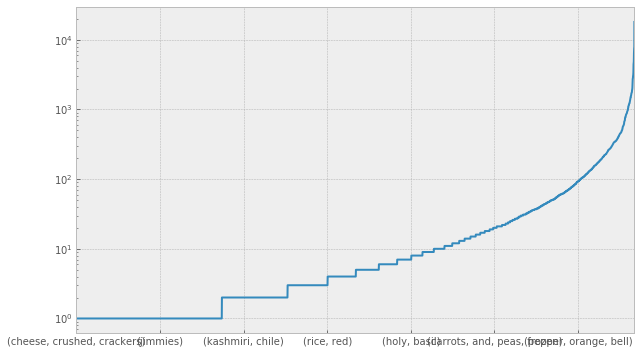

In [103]:
plt.figure(figsize=(10, 6))
pd.Series(vocabulary).sort_values().plot(logy=True)

In [104]:
def improve_ingredients(ingredient_list):
    "Improves the list of ingredients given as input."
    better_ingredients = []
    for ingredient in ingredient_list:
        cleaned_ingredient = clean_string(ingredient)
        if vocabulary[to_ingredient(cleaned_ingredient)] <= 100:
            better_ingredients.append(" ".join(best_replacement_increasing_distance(
                                        to_ingredient(cleaned_ingredient), vocabulary)))
        else:
            better_ingredients.append(cleaned_ingredient)
    return ";".join(better_ingredients)

In [105]:
df_test = pd.read_json(codecs.open('test.json', 'r', 'utf-8'))
all_ingredients_text = []
for df in [df_train, df_test]:
    for ingredient_list in df.ingredients:
        all_ingredients_text += [clean_string(ing) for ing in ingredient_list]
all_ingredients = [to_ingredient(text) for text in all_ingredients_text]
c = Counter(all_ingredients)
vocabulary = dict(c.most_common())

In [106]:
df_train['better_ingredients'] = df_train['ingredients'].map(improve_ingredients)

In [107]:
df_train.head(10)

,cuisine,id,ingredients,all_ingredients,better_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...,romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...,plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...,eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt,water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...,black pepper;shallots;cornflour;cayenne pepper...
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",plain flour;sugar;butter;eggs;fresh ginger roo...,plain flour;sugar;butter;eggs;fresh ginger roo...
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",olive oil;salt;medium shrimp;pepper;garlic;cho...,olive oil;salt;medium shrimp;pepper;garlic;cho...
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",sugar;pistachio nuts;white almond bark;flour;v...,sugar;nuts pistachio;almond bark white;flour;v...
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",olive oil;purple onion;fresh pineapple;pork;po...,olive oil;purple onion;fresh pineapple;pork;po...
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",chopped tomatoes;fresh basil;garlic;extra-virg...,chopped tomatoes;fresh basil;garlic;extravirgi...


In [108]:
X = cv.fit_transform(df_train['better_ingredients'].values)

In [109]:
evaluate_cross_validation(logistic, X, y, 5)

[ 0.78818353  0.78667505  0.78214959  0.7894406   0.77923058]
Mean score: 0.785 (+/-0.002)


In [110]:
df_test['better_ingredients'] = df_test['ingredients'].map(improve_ingredients)

In [111]:
X_submit = cv.transform(df_test['better_ingredients'].values)

In [112]:
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
from sklearn.grid_search import GridSearchCV
lr = LogisticRegression(random_state=42)
grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 2, 3, 5, 10]}
clf = GridSearchCV(lr, param_grid = grid, scoring = 'accuracy', cv = 5)
clf.fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'C': 5, 'penalty': 'l2'}
0.7908684064967064


In [120]:
from sklearn.ensemble import AdaBoostClassifier